In [1]:
from google.colab import files
uploaded = files.upload()

Saving text_emotion.csv to text_emotion.csv


In [105]:
from google.colab import files
uploaded = files.upload()

Saving trgtw2.csv to trgtw2 (1).csv


In [0]:
import numpy as np
import pandas as pd
import re,string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [0]:
tar = pd.read_csv('trgtw2.csv')
test = tar['Target tweets']

In [6]:
df = pd.read_csv('text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [9]:
# Number of tweets showing a particular sentiment
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [0]:
df = df.drop(df[df.sentiment == 'anger'].index)
df = df.drop(df[df.sentiment == 'empty'].index)
df = df.drop(df[df.sentiment == 'surprise'].index)
df = df.drop(df[df.sentiment == 'boredom'].index)
df = df.drop(df[df.sentiment == 'enthusiasm'].index)
df = df.drop(df[df.sentiment == 'hate'].index)
df = df.drop(df[df.sentiment == 'love'].index)

In [11]:
df['sentiment'].value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
fun          1776
relief       1526
Name: sentiment, dtype: int64

In [0]:
# Random oversampling to manage imbalanced data
c1 = df['sentiment'] == 'happiness'
df_rep = df[c1]
df= df.append([df_rep]*1,ignore_index=True)

In [0]:
# Random oversampling to manage imbalanced data
c2 = df['sentiment'] == 'sadness'
df_rep = df[c2]
df= df.append([df_rep]*1,ignore_index=True)

In [0]:
# Random oversampling to manage imbalanced data
c3 = df['sentiment'] == 'relief'
df_rep = df[c3]
#df = df.append([df_rep]*2,ignore_index=True)
df = df.append([df_rep]*1,ignore_index=True)

In [0]:
# Random oversampling to manage imbalanced data
c4 = df['sentiment'] == 'fun'
df_rep = df[c4]
df = df.append([df_rep]*3,ignore_index=True)
# df = df.append([df_rep]*1,ignore_index=True)

In [22]:
df['sentiment'].value_counts()

fun          14208
happiness    10418
sadness      10330
relief        9156
neutral       8638
worry         8459
Name: sentiment, dtype: int64

In [24]:
data = df[['sentiment','content']]
data.head()

,sentiment,content
0,sadness,Layin n bed with a headache ughhhh...waitin o...
1,sadness,Funeral ceremony...gloomy friday...
2,neutral,@dannycastillo We want to trade with someone w...
3,worry,Re-pinging @ghostridah14: why didn't you go to...
4,sadness,"I should be sleep, but im not! thinking about ..."


In [25]:
def clean(txt):
    txt = re.sub(r'@[A-Za-z0-9]+','', txt) # Removed mentions
    txt = re.sub(r'#','', txt) # Removed '#' symbol
    txt = re.sub(r'\n','', txt)
    txt = re.sub(r'RT[\s]+','', txt) # Remove RT
    txt = re.sub(r'https?:\/\/\S+','', txt) # Hyperlinks
    
    return txt
# Cleaning the tweets
data['content'] = data['content'].apply(clean)
# Show clean text
data['content'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0    Layin n bed with a headache  ughhhh...waitin o...
1                  Funeral ceremony...gloomy friday...
2     We want to trade with someone who has Houston...
3    Re-pinging : why didn't you go to prom? BC my ...
4    I should be sleep, but im not! thinking about ...
Name: content, dtype: object

In [26]:
# Optional
data.content.values

array(['Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...',
       ' We want to trade with someone who has Houston tickets, but no one will.',
       ..., ' Smile. Everything worked out.',
       'Assignment actually looking pretty decent....so glad I changed my topic at the last minute',
       'Gooood party last night (: Although I am extremely tired now. xD Off to bed to lounge around watch tv and sleep all day'],
      dtype=object)

In [107]:
test = test.apply(clean)
test.head()

0    When happy smoke weed when sad smoke weed all ...
1    you dont like weed all you have not smoke and ...
2    You ever be high you have change you breathe f...
3                                      Gunna Lil Baby 
4                    NowPlaying Wiz khalifa Lil Skies 
Name: Target tweets, dtype: object

In [0]:
data = data.dropna()
def r_punc(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

In [0]:
test = test.apply(lambda x : r_punc(x))

In [35]:
data['content'] = data['content'].apply(lambda x : r_punc(x))
data['content']

0        Layin n bed with a headache  ughhhhwaitin on y...
1                            Funeral ceremonygloomy friday
2         We want to trade with someone who has Houston...
3        Repinging  why didnt you go to prom BC my bf d...
4        I should be sleep but im not thinking about an...
                               ...                        
61204    Morning all finally got to stream media from P...
61205    juz donated booksmags 4 charity Not only do I ...
61206                          Smile Everything worked out
61207    Assignment actually looking pretty decentso gl...
61208    Gooood party last night  Although I am extreme...
Name: content, Length: 61209, dtype: object

In [0]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [37]:
data['content'] = data['content'].apply(lambda x : tokenizer.tokenize(x.lower()))
data['content'].head()

0    [layin, n, bed, with, a, headache, ughhhhwaiti...
1                    [funeral, ceremonygloomy, friday]
2    [we, want, to, trade, with, someone, who, has,...
3    [repinging, why, didnt, you, go, to, prom, bc,...
4    [i, should, be, sleep, but, im, not, thinking,...
Name: content, dtype: object

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def st_words(text):
    en_stops = set(stopwords.words('english'))
    words = [w for w in text if w not in en_stops]
    return words

In [40]:
data['content'] = data['content'].apply(lambda x : st_words(x))
data['content'].head()

0        [layin, n, bed, headache, ughhhhwaitin, call]
1                    [funeral, ceremonygloomy, friday]
2        [want, trade, someone, houston, tickets, one]
3    [repinging, didnt, go, prom, bc, bf, didnt, li...
4    [sleep, im, thinking, old, friend, want, hes, ...
Name: content, dtype: object

In [41]:
# Natural lang toolkit
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lemmatizer = WordNetLemmatizer()
def word_lem(text):
    l_txt = [lemmatizer.lemmatize(i) for i in text]
    return l_txt

In [43]:
data['content'] = data['content'].apply(lambda x : word_lem(x))
data['content'].head()

0        [layin, n, bed, headache, ughhhhwaitin, call]
1                    [funeral, ceremonygloomy, friday]
2         [want, trade, someone, houston, ticket, one]
3    [repinging, didnt, go, prom, bc, bf, didnt, li...
4    [sleep, im, thinking, old, friend, want, he, m...
Name: content, dtype: object

In [0]:
stemmer = PorterStemmer()
def word_stem(text):
    stm_txt = " ".join([stemmer.stem(i) for i in text])
    return stm_txt

In [45]:
data['content'] = data['content'].apply(lambda x : word_stem(x))
data['content'].head()

0                layin n bed headach ughhhhwaitin call
1                          funer ceremonygloomi friday
2                 want trade someon houston ticket one
3         reping didnt go prom bc bf didnt like friend
4    sleep im think old friend want he marri damn a...
Name: content, dtype: object

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [51]:
sent = data['sentiment']
label = le.fit_transform(sent)
label

array([4, 4, 2, ..., 3, 3, 3])

In [52]:
# Assigning labels to each emotion
data["label"] = label
data.head()

,sentiment,content,label
0,sadness,layin n bed headach ughhhhwaitin call,4
1,sadness,funer ceremonygloomi friday,4
2,neutral,want trade someon houston ticket one,2
3,worry,reping didnt go prom bc bf didnt like friend,5
4,sadness,sleep im think old friend want he marri damn a...,4


In [53]:
le.classes_

array(['fun', 'happiness', 'neutral', 'relief', 'sadness', 'worry'],
      dtype=object)

In [54]:
list(le.inverse_transform([1,4,3]))

['happiness', 'sadness', 'relief']

In [58]:
X1 = data['content'].values
y1 = label
print(X1.shape)
print(y1.shape)

(61209,)
(61209,)


In [59]:
# Dividing whole dataset into training dataset(75% of total) and testing dataset(25% of total)
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.10, random_state = 2000, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55088,)
(6121,)
(55088,)
(6121,)


In [0]:
# Feauturization using CountVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
X_train_counts = count_vec.fit_transform(X_train)

In [61]:
X_train_counts

<55088x24103 sparse matrix of type '<class 'numpy.int64'>'
	with 399473 stored elements in Compressed Sparse Row format>

In [62]:
X_train_counts.shape

(55088, 24103)

In [108]:
# Target tweets
X_test_counts1 = count_vec.transform(test)
X_test_counts1

<85x24103 sparse matrix of type '<class 'numpy.int64'>'
	with 469 stored elements in Compressed Sparse Row format>

In [63]:
# Featurization using TfidfTransformer()
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(55088, 24103)

In [64]:
# Model 1 : Training Multinomial Naive Bayes model using Tfidf vectorization
model1 = MultinomialNB().fit(X_train_tfidf,y_train)
text_model1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('model1', MultinomialNB()),])
%time text_model1 = text_model1.fit(X_train, y_train)

CPU times: user 553 ms, sys: 8.9 ms, total: 561 ms
Wall time: 562 ms


In [71]:
# To predict the emotion of target tweets
y_pred1 = text_model1.predict(X_test)
y_pred1

array([0, 1, 1, ..., 3, 1, 4])

In [72]:
le.inverse_transform(y_pred1)

array(['fun', 'happiness', 'happiness', ..., 'relief', 'happiness',
       'sadness'], dtype=object)

In [0]:
y_pr = text_model1.predict(test)
#y_pr

In [110]:
print("Accuracy of MultinomialNB Model 1 is : ",(text_model1.score(X_test,y_test))*100)

Accuracy of MultinomialNB Model 1 is :  53.847410553831075


In [73]:
# Model2 : Training Multinomial Naive Bayes model using CountVectorizer outcomes
model2 = MultinomialNB()
%time model2.fit( X_train_counts, y_train)

CPU times: user 26.9 ms, sys: 0 ns, total: 26.9 ms
Wall time: 29.5 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
X_test_counts = count_vec.transform(X_test)
X_test_counts

<6121x24103 sparse matrix of type '<class 'numpy.int64'>'
	with 43312 stored elements in Compressed Sparse Row format>

In [75]:
y_pred2 = model2.predict(X_test_counts)
y_pred2

array([0, 1, 1, ..., 3, 1, 4])

In [76]:
from sklearn import metrics
print("Accuracy of MultinomialNB Model 2 is : ",(metrics.accuracy_score(y_test,y_pred2))*100)

Accuracy of MultinomialNB Model 2 is :  58.013396503839246


In [0]:
from sklearn.linear_model import SGDClassifier

In [78]:
# Model 3 : Linear support vector machine
lsvm = SGDClassifier(alpha=0.0001, random_state=5, max_iter=10, tol=None)
lsvm.fit(X_train_counts, y_train)
y_pred = lsvm.predict(X_test_counts)
print('lsvm using count vectors accuracy %s' % round(metrics.accuracy_score(y_pred, y_test)*100))

lsvm using count vectors accuracy 61.0


In [0]:
# Predicting emotions of each target tweet
y_pred11 = lsvm.predict(X_test_counts1)
tar11 = le.inverse_transform(y_pred11)

In [112]:
# Create a dataframe to store output of target tweets using lsvm model
tar21 = pd.DataFrame(tar11)
tar21[0].value_counts()

fun          29
sadness      16
relief       15
happiness    13
worry        10
neutral       2
Name: 0, dtype: int64

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Emotion detection using LSVM model')

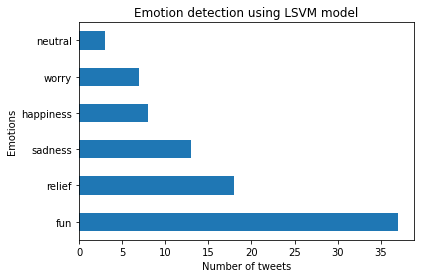

In [104]:
tar21[0].value_counts().plot(kind = 'barh')
plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Emotion detection using LSVM model')
#plt.savefig("tar2_ls.jpg", dpi = 200, bbox_inches = 'tight')

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_counts, y_train)
y_pred3 = rf.predict(X_test_counts)

In [84]:
print('random forest with count vectors accuracy %s' % metrics.accuracy_score(y_pred3, y_test))

random forest with count vectors accuracy 0.80280999836628


In [0]:
# Predicting emotions of each target tweet
y_pred31 = rf.predict(X_test_counts1)
tar1 = le.inverse_transform(y_pred31)

In [114]:
# Create a dataframe to store output of target tweets using rf model
tar2 = pd.DataFrame(data = tar1)
tar2[0].value_counts()

neutral      42
worry        17
sadness      12
happiness     8
fun           5
relief        1
Name: 0, dtype: int64

Text(0.5, 1.0, 'Emotion detection using Random forest model')

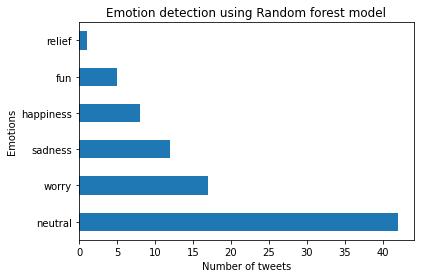

In [115]:
tar2[0].value_counts().plot(kind = 'barh')
plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Emotion detection using Random forest model')
#plt.show()
#plt.savefig("tar2_rf.jpg", dpi = 200, bbox_inches = 'tight')

In [0]:
#files.download('tar2_rf.jpg')

In [0]:
# To check performance of Classification
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred1) # multinomial
cm2 = confusion_matrix(y_test,y_pred) #lsvm
cm3 = confusion_matrix(y_test,y_pred3) #rf

In [0]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def overall_precision(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def Accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [0]:
# Performance of Model 4 (RF model)
l1=[]
p1=[]
r1=[]
for label in range(6):
    l1.append(f"{label:5d}")
    p1.append(f"{precision(label, cm3):9.3f}")
    r1.append(f"{recall(label, cm3):6.3f}")

In [0]:
emo = label

In [121]:
#dictionary of lists
dict = {"Emotion":emo,"Label":l1,"Precision":p1,"Recall":r1}
rdf1 = pd.DataFrame(dict)
rdf1

,Emotion,Label,Precision,Recall
0,5,0,0.948,0.999
1,5,1,0.814,0.923
2,5,2,0.576,0.509
3,5,3,0.906,0.987
4,5,4,0.754,0.934
5,5,5,0.594,0.285


In [122]:
print("Model 1 : Overall Precision (in %age) is", (overall_precision(cm3))*100)

Model 1 : Overall Precision (in %age) is 76.53583610466232


In [123]:
print("Model 2: Calculated Overall Accuracy (in %age) is", (Accuracy(cm3))*100)

Model 2: Calculated Overall Accuracy (in %age) is 80.280999836628
